# CSIT 528 Homework 1
## [Name]: Marc Stern


Import libraries

In [2]:
%matplotlib inline

import pandas as pd
import numpy as np
from scipy.stats import trim_mean

import seaborn as sns
import matplotlib.pylab as plt
pd.options.display.max_rows = 10

Load the Data 

2008 US state election results

In [3]:
election = pd.read_csv('2008_all_states.csv')
election

,state,county,total_votes,dem_votes,rep_votes,other_votes,dem_share,east_west
0,AK,"State House District 8, Denali-University",10320,4995,4983,342,50.06,west
1,AK,"State House District 37, Bristol Bay-Aleuti",4665,1868,2661,136,41.24,west
2,AK,"State House District 12, Richardson-Glenn H",7589,1914,5467,208,25.93,west
3,AK,"State House District 13, Greater Palmer",11526,2800,8432,294,24.93,west
4,AK,"State House District 14, Greater Wasilla",10456,2132,8108,216,20.82,west
...,...,...,...,...,...,...,...,...
3148,OH,Hamilton County,425086,225213,195530,4343,53.53,east
3149,OH,Highland County,19186,6856,11907,423,36.54,east
3150,OH,Hocking County,12961,6259,6364,338,49.58,east
3151,OH,Licking County,82356,33932,46918,1506,41.97,east


## Question 1.  Organizing Data

### Question 1.1 [10 points] Frequency table
Make a frequency table showing the percentages of voting for Obama (dem_share) in NJ including range of classes, frequencies, and relative frequencies. Use the 'square root' rule to decide the number of bins. 

In [4]:
# calculate number of bins

nj_dem_share = election.loc[election['state'] == 'NJ', 'dem_share']
num_bins = np.ceil(np.sqrt(nj_dem_share.count()))
num_bins

5.0

In [5]:
# organize bins

bin_pop = pd.cut(nj_dem_share, num_bins)
bin_pop_freq = bin_pop.value_counts()
bin_pop_freq.sort_index()

(39.453, 46.88]    6
(46.88, 54.27]     3
(54.27, 61.66]     7
(61.66, 69.05]     3
(69.05, 76.44]     2
Name: dem_share, dtype: int64

In [6]:
# create new dataframe with binnedPopulation

bin_pop.name = 'binnedPopulation'
df = pd.concat([nj_dem_share, bin_pop], axis=1)
df.head()

,dem_share,binnedPopulation
935,39.49,"(39.453, 46.88]"
957,60.95,"(54.27, 61.66]"
984,54.77,"(54.27, 61.66]"
989,42.86,"(39.453, 46.88]"
990,45.90,"(39.453, 46.88]"


In [7]:
# create frequency table

total = df['dem_share'].count()
groups = []

for group, subset in df.groupby(by='binnedPopulation'):
    
    groups.append({
        'BinRange': group,
        'Freq': len(subset),
        'Rel-Freq': len(subset)/total
    })
    
freq_table = pd.DataFrame(groups)
print (freq_table)

          BinRange  Freq  Rel-Freq
0  (39.453, 46.88]     6  0.285714
1   (46.88, 54.27]     3  0.142857
2   (54.27, 61.66]     7  0.333333
3   (61.66, 69.05]     3  0.142857
4   (69.05, 76.44]     2  0.095238


### Question 1.2 [5 points] Histogram
Draw the histogram showing the percentages of voting for Obama (dem_share) in NJ

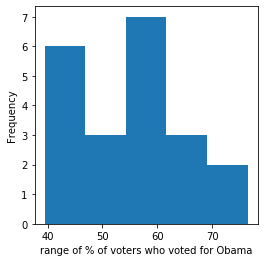

In [8]:
ax = nj_dem_share.plot.hist(figsize=(4, 4), bins=5)
ax.set_xlabel('range of % of voters who voted for Obama')
plt.show()

### Question 1.3 [10 points] CDF (Ogive)
Draw the Ogive showing the percentages of voting for Obama (dem_share) in NJ. 

In [9]:
# calculate x and y values

xvals = [val.right for val in freq_table['BinRange']]
xvals.insert(0, freq_table['BinRange'][0].left)

yvals = [val for val in freq_table['Rel-Freq'].cumsum()]
yvals.insert(0,0)

xvals, yvals

([39.453, 46.88, 54.27, 61.66, 69.05, 76.44],
 [0,
  0.2857142857142857,
  0.42857142857142855,
  0.7619047619047619,
  0.9047619047619047,
  0.9999999999999999])

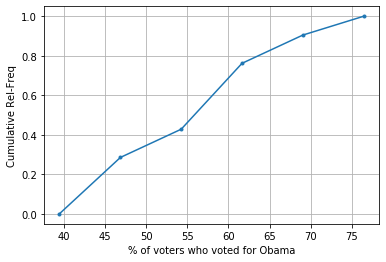

In [10]:
# create ogive 

plt.plot(xvals, yvals, marker='.')
plt.xlabel('% of voters who voted for Obama'), plt.ylabel('Cumulative Rel-Freq')
plt.grid()
plt.show()

## Question 2. Average and variation

### Question 2.1 [10 points]
Compute the following values of the percentage of voting for Obama (dem_share) in each state:
1. minimum value,
2. maximum value,
3. mean,
4. standard deviation (population std),
5. the interquartile range

Create a dataframe to collect all above data. Each row represents a state and columns represent the above five types of summary statistics. 

In [25]:
dem_share_by_state = election.groupby('state')['dem_share'].describe()
iqr = dem_share_by_state['75%'] - dem_share_by_state['25%']
dem_share_by_state = dem_share_by_state.assign(IQR=iqr).drop(['count', '25%', '50%', '75%'], axis=1)
dem_share_by_state

,mean,std,min,max,IQR
state,,,,,
AK,40.127250,11.352997,19.92,66.66,14.8375
AL,38.564328,17.655682,14.72,87.16,20.4100
AR,38.043200,9.662051,23.74,64.80,9.7000
AZ,44.510667,11.094133,29.35,65.76,12.1050
CA,54.387241,13.451446,30.59,86.01,20.8850
...,...,...,...,...,...
VT,66.892857,4.965220,57.44,74.57,7.7800
WA,48.768718,10.647119,28.46,71.39,15.4650
WI,55.815556,8.171475,35.02,87.17,9.7525


### Question 2.2 [5 points] Box plot

Make a box-and-whisker plot to show the distribution of the percentage of voting for Obama (dem_share) in two regions (east and west).

[Text(0, 0.5, 'East vs. West'),
 Text(0.5, 0, '% of voters who voted for Obama')]

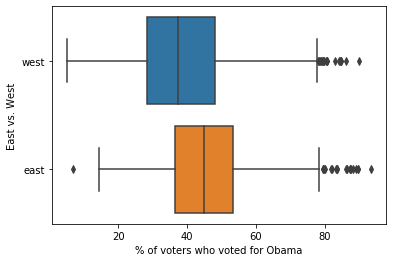

In [26]:
sns.boxplot(data=election, x='dem_share', y='east_west')\
   .set(xlabel='% of voters who voted for Obama', ylabel='East vs. West')

## Question 3. Short answers

### 3.1 [2 points]
The Covernor of California proposes to give all state employees a flat raise of $250 a month. What would this do to the average monthly salary of state employees? to the standard deviation?

Answer:

If everyone gets an equal raise, the average monthly salary of the satae employees will increase. However, since the salary increase is flat, the spread of monthly salary data will remain the same, therefore the standard deviation should remain unchanged. The code example below shows this concept. 

In [27]:
salaries = pd.DataFrame({'salaries': [500, 750, 1000, 1250, 576, 800]})
salaries_raise = salaries + 250
print (salaries.mean() < salaries_raise.mean(), salaries.std() == salaries_raise.std())

# results read: 

# Is the original salary avg less than avg of salaries after flat raise? True
# Is the original standard deviation the same after the flat salary raise? True

salaries    True
dtype: bool salaries    True
dtype: bool


### 3.2 [2 points]
Can standard deviation ever be negative? 

Answer:

Becuase the sample variance is calculated through the sum of squares formula, it will never be negative, as any number squared is positive. Furthermore, the standard deviation is calculated by taking the sqauare root of the sample variance. If the sample variance is always positive, then its square root (standard deviation) must also be positive.

### 3.3 [2 points]
For a list of positive numbers, can the standard deviation ever be larger than the average? Give an example to explain your answer.

Answer:

A list of positive numbers that has a dramatic spread of data can have a larger standard deviation than the average. 

In [28]:
# This example shows that for the total number of votes per state (data collected from all counties), 
# the standard deviation is greater than the average (mean) for 40 out of 50 states (80%).

votes_bystate = election.groupby('state')['total_votes'].describe()\
                        .drop(['count', 'min', '25%', '50%', '75%', 'max'], axis=1)
votes_bystate[votes_bystate['std'] > votes_bystate['mean']]

,mean,std
state,,
AL,31340.582090,48238.788511
AR,14488.226667,22231.417191
AZ,152898.333333,348743.395004
CA,233825.862069,488982.547111
CO,37521.265625,74437.019411
...,...,...
UT,32840.344828,73043.175647
VA,27785.052239,54948.295037
WA,77868.666667,160261.099877


### 3.4 [4 points]
An investigator has a computer file showing family incomes for 2,000 subjects in a certain study. These range from $5,800 a year to $ 96,800 a year. By accident, the highest income in the file gets changed to $968,000.

1. Doese this affect the average? If so, by how much?
2. Does this affect the median? If so, by how much?

Answer:

1. The average will increase by a significant margin, considering the highest value is now 10x the previous highest value, and ~167x the lowest value (compared to ~17x before the error is made). The more subjects in a study, the less the average will be affected. In this case, a severe alteration that misrepresents the average of the data is to be expected. 

2. The median will remain unchanged, as only the highest value was changed, and no additional values were added. In other words, the median remains the same since the number of data values (and order) is unchanged.